# Week 2 DataLab Prep 3

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  Daily Minimum Temperatures Dataset:
This dataset records the daily minimum temperatures in Melbourne, Australia, from 1981 to 1990.


In [29]:
# URL to the dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = "daily_min_temperatures.csv"
# Read the CSV file into a DataFrame
tempData = pd.read_csv("daily_min_temperatures.csv")

In [30]:
tempData.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Check Data Type

In [31]:
tempData.dtypes

Date     object
Temp    float64
dtype: object

In [32]:
tempData['Date'] = pd.to_datetime(tempData.Date)

In [33]:
tempData.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [34]:
# Set the Date column as the index for the dataframe
tempData = tempData.set_index('Date')

In [35]:
tempData.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [36]:
# Summarize the values in time series data
tempData.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


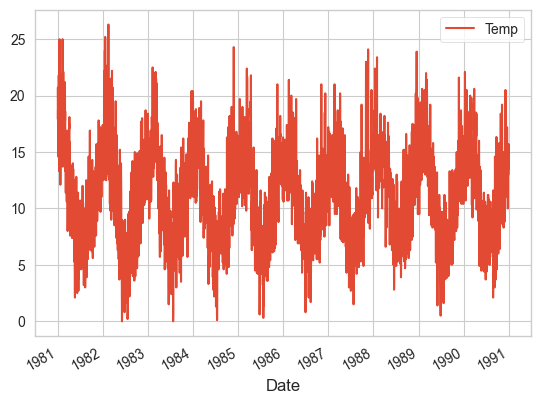

In [37]:
tempData.plot()
plt.savefig('init_plot.jpg')

plt.show()

In [38]:
# Available matplotlib styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

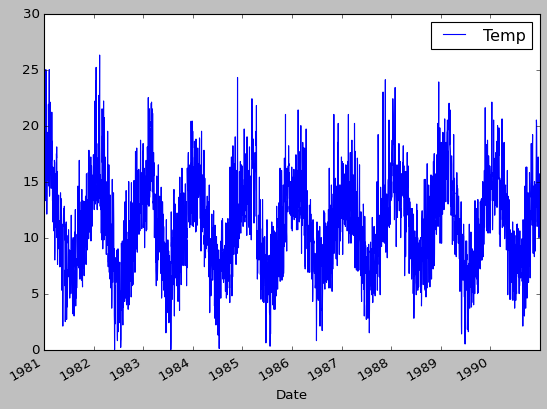

In [63]:
# Add style to your plot
plt.style.use('classic')
# import seaborn as sns

# sns.set_style("whitegrid")

tempData.plot()
plt.savefig('seaborn_plot.jpg')
plt.show()

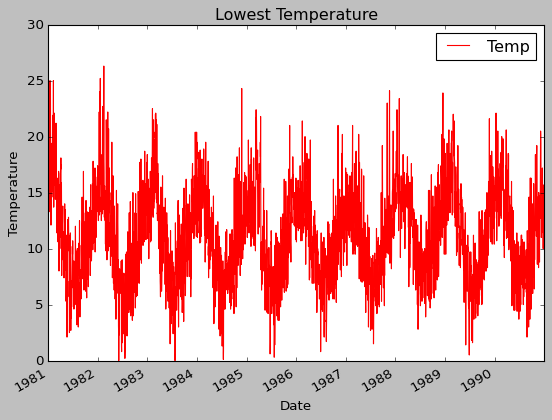

In [64]:
# Describe graph with labels

ax = tempData.plot(color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Lowest Temperature')

plt.savefig('labelTitle_plot.jpg')
plt.show()

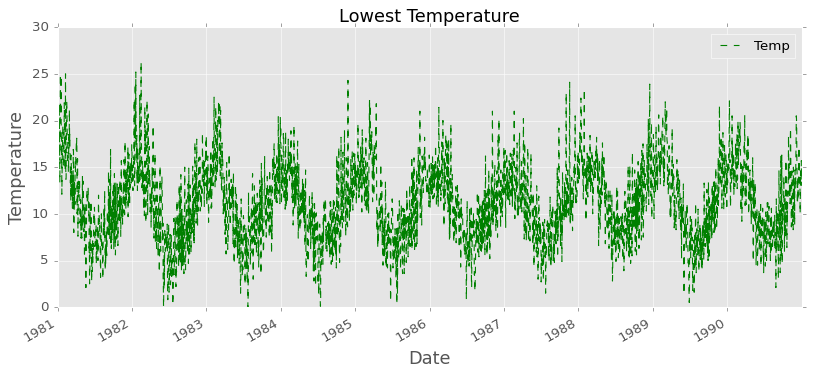

In [65]:
# Define figure size. linewidth, linestyle, and font size
plt.style.use('ggplot')
ax = tempData.plot(color= 'green', figsize=(12,5), fontsize=12, 
                   linewidth=1, linestyle='--')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Temperature', fontsize=16)
ax.set_title('Lowest Temperature', fontsize=16)

plt.savefig('Style_plot.jpg')
plt.show()

## Shaded Region

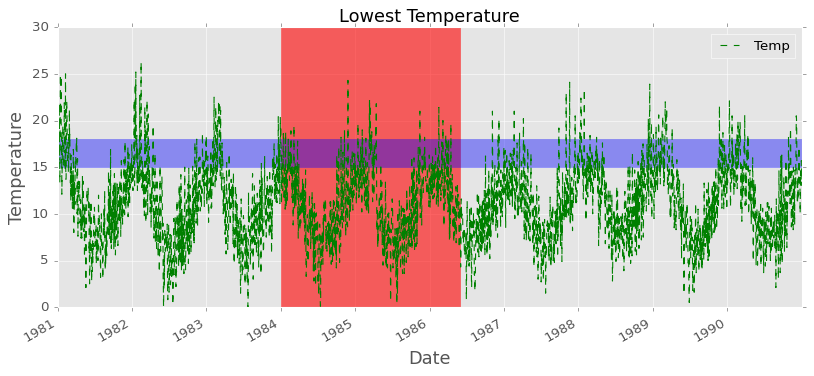

In [67]:
plt.style.use('ggplot')
ax = tempData.plot(color= 'green', figsize=(12,5), fontsize=12, 
                   linewidth=1, linestyle='--')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Temperature', fontsize=16)
ax.set_title('Lowest Temperature', fontsize=16)

# Add shaded region to the plot
ax.axvspan('1984-01-01', '1986-06-01', color='red', alpha=0.6)
ax.axhspan(15, 18, color='blue', alpha=0.4)

plt.savefig('highlight_plot.jpg')
plt.show()

## Vertical and Horizontal Markers

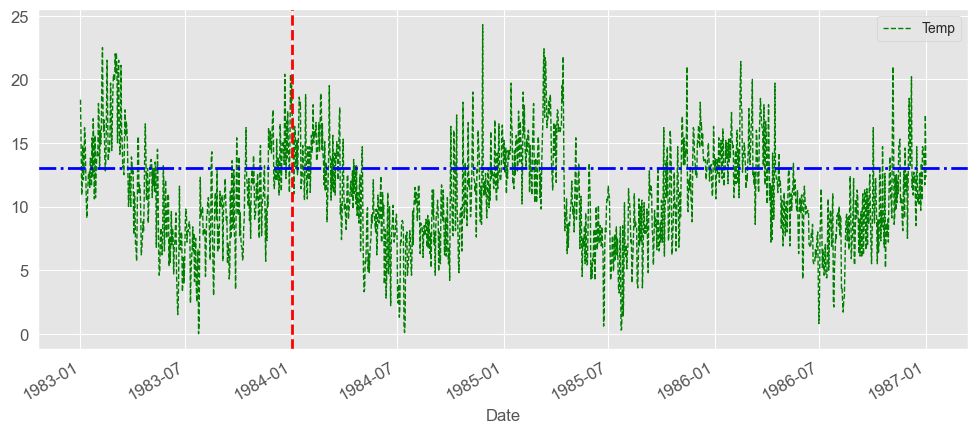

In [43]:
# Subset timeseries data
tempData_2 = tempData['1983-01-01':'1987-01-01']

ax = tempData_2.plot(color= 'green', figsize=(12,5), fontsize=12, 
                   linewidth=1, linestyle='--')

# Add vertical and horizontal markers
ax.axvline('1984-01-01', linestyle='--', color='red', linewidth=2)
ax.axhline(13, linestyle='-.', linewidth=2, color='blue')

plt.savefig('Markers_plot.jpg')
plt.show()

## Check Data for Missing Values

In [44]:
tempData.isna().sum()

Temp    0
dtype: int64

In [45]:
tempData.shape

(3650, 1)

## Moving Average Model

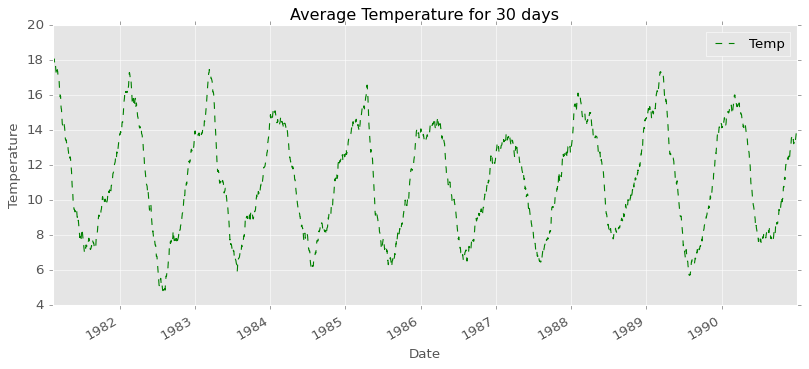

In [68]:
tempDataMonth = tempData.rolling(window=40).mean()
ax = tempDataMonth.plot(color='green', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Average Temperature for 30 days')

plt.savefig('MovingAvg_plot.jpg')
plt.show()

## Monthly Average Temperature

/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_48801/1884266426.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = tempData.resample('M').mean().plot(color='green', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')


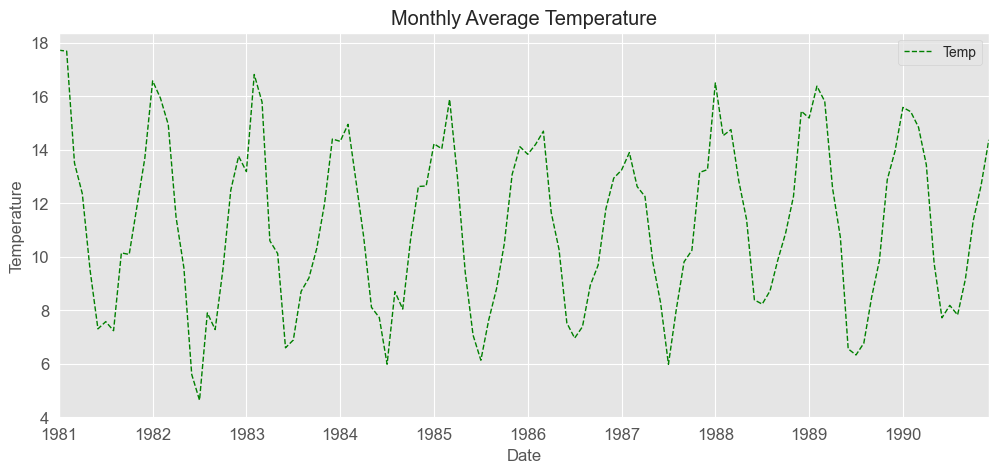

In [47]:
ax = tempData.resample('M').mean().plot(color='green', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Monthly Average Temperature')

plt.savefig('MonAvg_plot.jpg')
plt.show()

## Plot Aggregate Values

In [48]:
index_month = tempData.index.month
index_month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=3650)

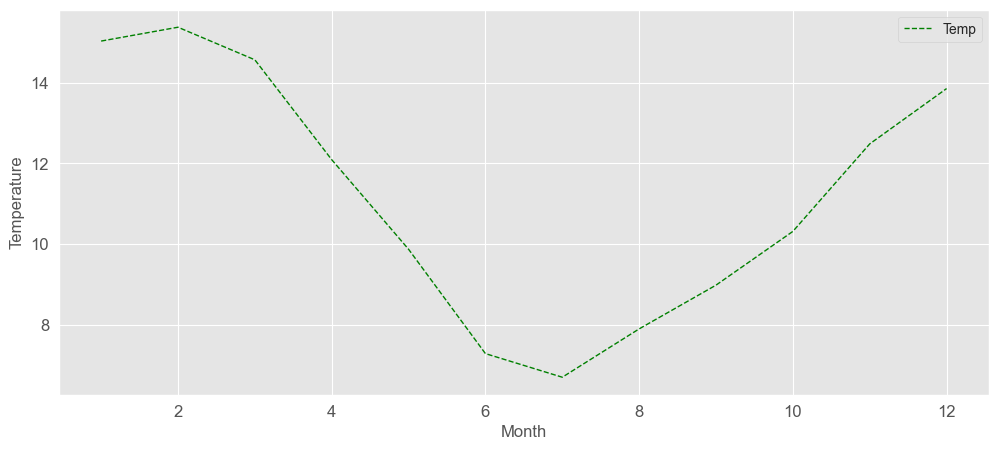

In [49]:
ax = tempData.groupby(index_month).mean().plot(color='green', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
plt.savefig('AvgDifMon_plot.jpg')
plt.show()

## Summarize Data with Boxplot

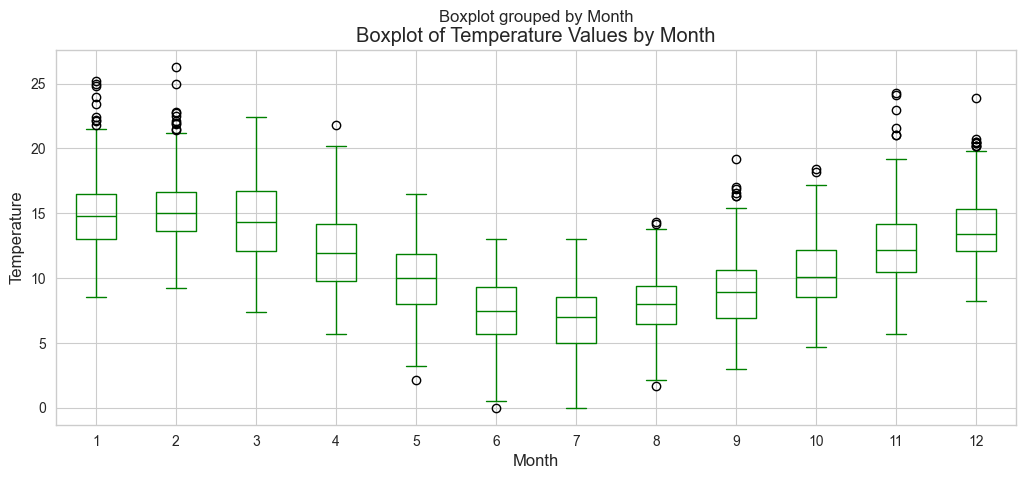

In [50]:
sns.set_style("whitegrid")
index_month = tempData.index.month
tempData['Month'] = index_month
ax = tempData.boxplot(by='Month', figsize=(12,5), color='green')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title('Boxplot of Temperature Values by Month')

plt.savefig('BoxPlot_plot.jpg')
plt.show()

# Romove the Month column
tempData = tempData.drop('Month', axis=1)

## Histogram and Density Plots

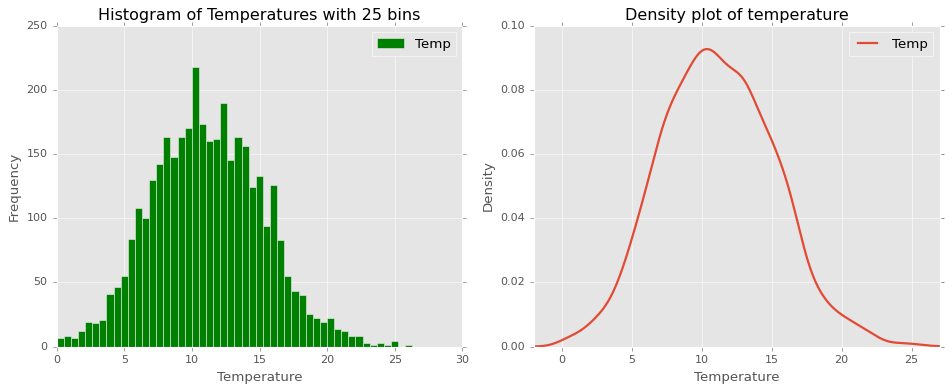

In [70]:
# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Plot histogram
tempData.plot(kind='hist', bins=50, title='Histogram of Temperatures with 25 bins',
              ax=ax[0], color='green')
ax[0].set_xlabel('Temperature')

# Plot density plot
tempData.plot(kind='density', linewidth=2, ax=ax[1], title='Density plot of temperature',
             xlim=(-2,27))
ax[1].set_xlabel('Temperature')

plt.tight_layout()

plt.savefig('HistDens_plot.jpg')
plt.show()

## Autocorrelation Plot

Autocorrelation refers to the degree of similarity between observations in a time series with respect to their lagged versions. In simpler terms, it measures the correlation between a sequence of values in a time series and a delayed or lagged version of itself.

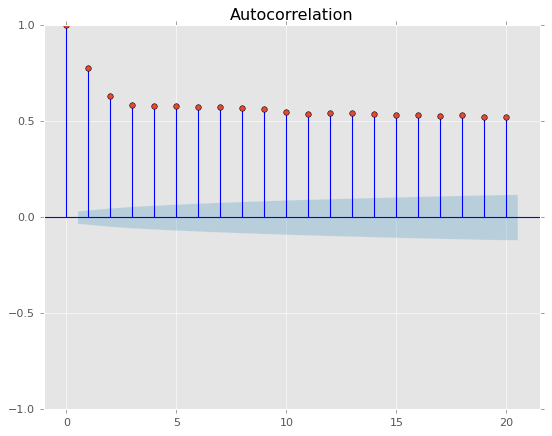

In [71]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(tempData, lags=20)

plt.savefig('AutoCorrelation_plot.jpg')

## Partial Autocorrelation Plot

Partial autocorrelation refers to the correlation between observations in a time series that are separated by a specific lag, while controlling for the influence of other data points occurring between them. It measures the direct relationship between two time points, excluding the indirect effects of intermediate time points in the series.

In simpler terms, the partial autocorrelation at a particular lag measures the correlation between two observations at that lag while removing the influence of correlations at shorter lags.

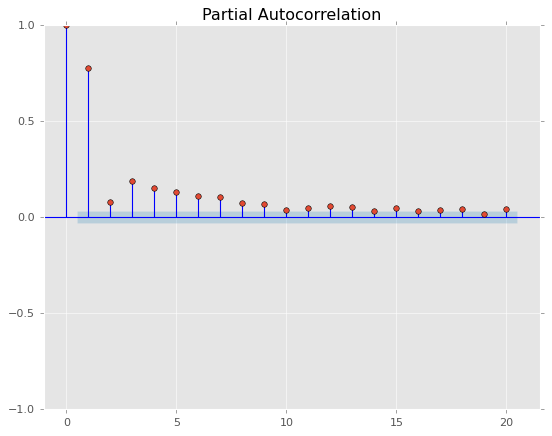

In [72]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(tempData, lags=20)

plt.savefig('PartialAutoCorr_plot.jpg')

### Time Series Decomposition 

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


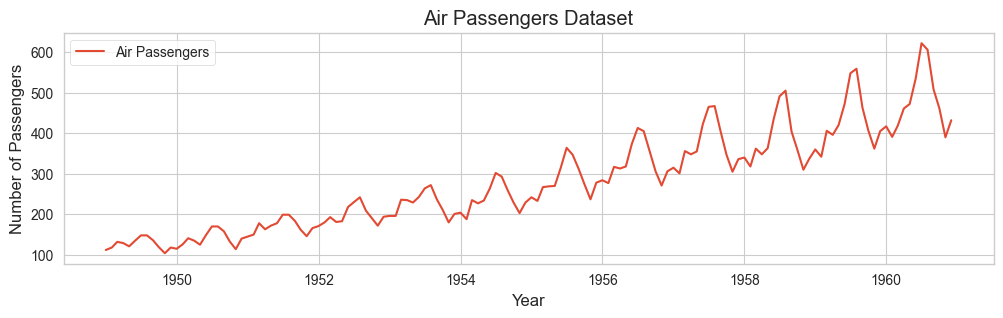

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Air Passengers dataset
# curl = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv('airline-passengers.csv')

# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as the index
df.set_index('Month', inplace=True)

# Display the first few rows of the dataset
print(df.head())

# Plotting the dataset to visualize trend and seasonality
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['Passengers'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Dataset')
plt.legend()
plt.grid(True)

plt.savefig('AirLine_plot.jpg')
plt.show()

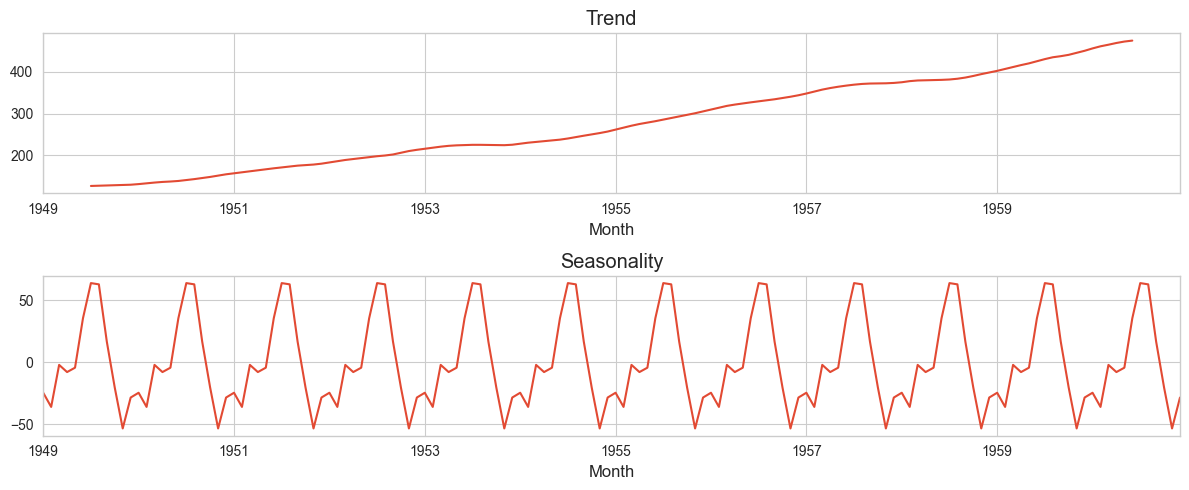

In [55]:
import statsmodels.api as sm
# from pylab import rcParams

decomposition = sm.tsa.seasonal_decompose(df)
trend = decomposition.trend
seasonal = decomposition.seasonal

fig, ax = plt.subplots(2,1, figsize=(12,5))
trend.plot(title='Trend', ax=ax[0])
seasonal.plot(title='Seasonality', ax=ax[1])

plt.tight_layout()

plt.savefig('TrendSeasonality_plot.jpg')
plt.show()

## More than One Time Series

We'll be working with daily time series of Open Power System Data (OPSD) for Germany, which has been rapidly expanding its renewable energy production in recent years.The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. 

In [56]:
data = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'])
data = data.set_index('Date')
data = data.resample('M').mean()
data = data.dropna()
data.head()

/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_48801/800321587.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-31,1351.441226,227.122419,17.346452,244.468871
2012-02-29,1426.666241,157.806345,36.093724,193.900069
2012-03-31,1294.748258,129.952387,75.706355,205.658742
2012-04-30,1264.427000,113.164300,89.109933,202.274233
2012-05-31,1239.388710,93.269032,133.747742,227.016774


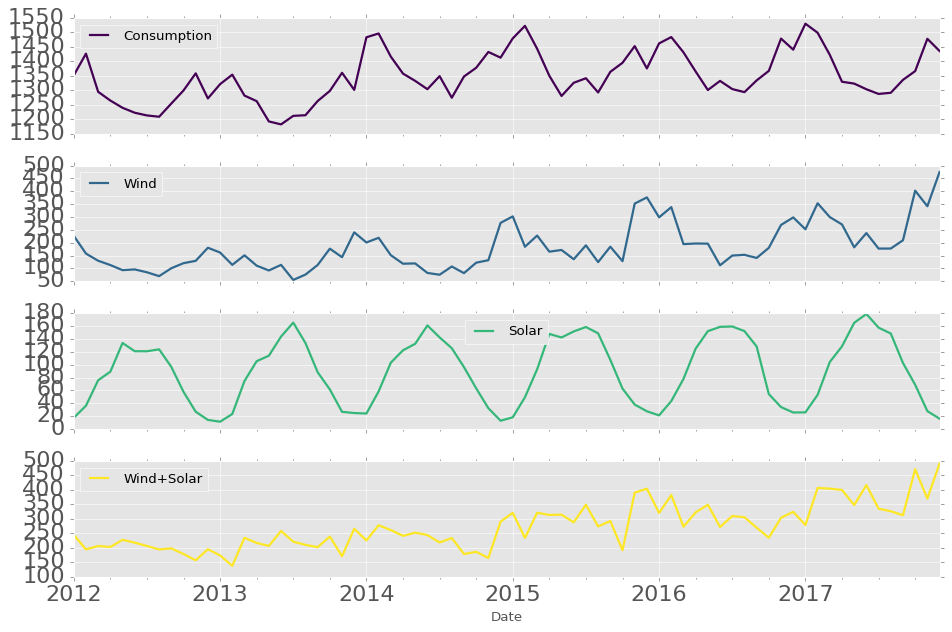

In [78]:
ax = data.plot(figsize=(12,8), subplots=True,  sharey=False, sharex=True,
         colormap='viridis', fontsize=20, linewidth=2)

plt.tight_layout()
plt.savefig('MultTimeSeries.jpg')
plt.show()

## Visualization Correlation Matrices

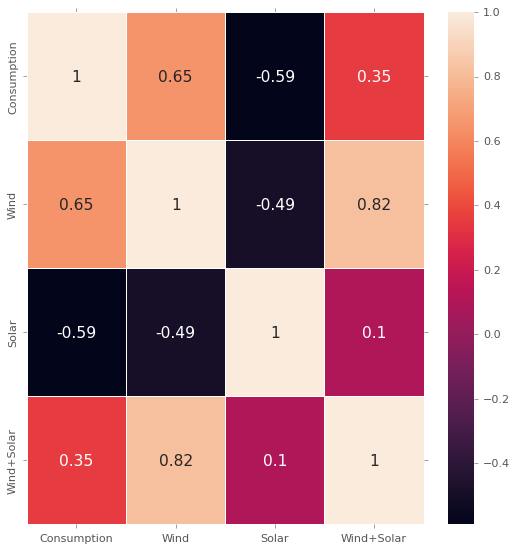

In [77]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix
corr_mat = data.corr(method='pearson')

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, annot=True, linewidth=0.6, annot_kws={"size":14})

plt.savefig('CorrMat_plot.jpg')
plt.show()